In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2025-11-24 16:02:22.838993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764000143.132522      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764000143.217970      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols]=df[numeric_cols].round(2)
    X = df.drop(columns=["Label"]).replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean()).values

    y = df["Label"].astype(str).values
    return X, y

In [3]:
def preprocess_data(X, y):
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    num_classes = len(np.unique(y))
    y = to_categorical(y, num_classes=num_classes)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, y, num_classes, encoder, scaler

In [4]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=32, kernel_size=9, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(16, dropout=0.2),
        Dense(num_classes, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [5]:
def train_model(model, X_train, y_train, epochs=20, batch_size=128):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        shuffle=True
    )
    return history

In [6]:
def evaluate_and_plot(model, history, X_test, y_test):
    loss, acc = model.evaluate(X_test, y_test)
    print("Test Accuracy:", acc)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train Accuracy', 'Validation Accuracy'])
    plt.grid(True)
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train Loss', 'Validation Loss'])
    plt.grid(True)
    plt.show()

    return acc

In [7]:
def full_pipeline(path):

    X, y = load_data(path)

    X, y, num_classes, encoder, scaler = preprocess_data(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )

    model = build_model((X.shape[1], 1), num_classes)
    model.summary()

    history = train_model(model, X_train, y_train)

    test_acc = evaluate_and_plot(model, history, X_test, y_test)

    return model, encoder, scaler, test_acc


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-24 16:04:04.284287: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 31, 32)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 34)             │           578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,034 (15.76 KB)

 Trainable params: 4,034 (15.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 442s 11ms/step - accuracy: 0.7095 - loss: 0.6551 - val_accuracy: 0.7515 - val_loss: 0.4857
Epoch 2/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 438s 11ms/step - accuracy: 0.7485 - loss: 0.4916 - val_accuracy: 0.7512 - val_loss: 0.4803
Epoch 3/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 435s 11ms/step - accuracy: 0.7522 - loss: 0.4848 - val_accuracy: 0.7531 - val_loss: 0.4759
Epoch 4/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 437s 11ms/step - accuracy: 0.7610 - loss: 0.4737 - val_accuracy: 0.7676 - val_loss: 0.4615
Epoch 5/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 432s 11ms/step - accuracy: 0.7639 - loss: 0.4663 - val_accuracy: 0.7695 - val_loss: 0.4566
Epoch 6/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 441s 11ms/step - accuracy: 0.7658 - loss: 0.4627 - val_accuracy: 0.7696 - val_loss: 0.4530
Epoch 7/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 445s 11ms/step - accuracy: 0.7658 - loss: 0.4613 - val_accuracy: 0.7681 - val_loss: 0.4544
Epoch 8/20
40737/40737 ━━━━━━━━━━━━━━━━━━━━ 432s 11ms/s

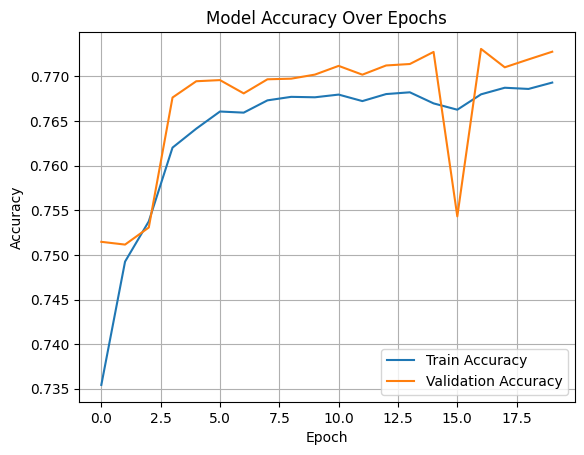

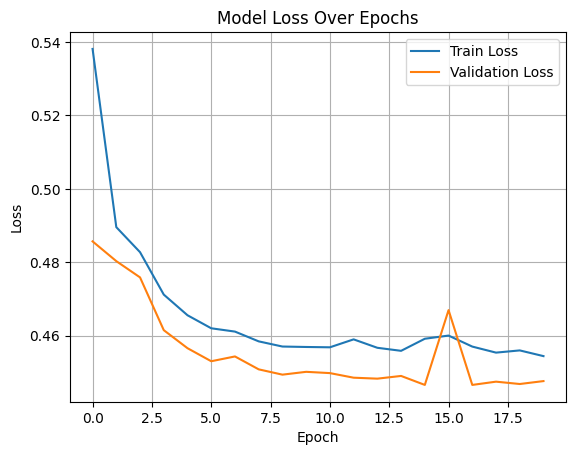

Final Test Accuracy: 0.7739517688751221


In [8]:
path = r"/kaggle/input/ciciot-2023-stratified-dataset/Stratified_data.csv"

model, encoder, scaler, acc = full_pipeline(path)
print("Final Test Accuracy:", acc)